## Database integration

To access the data, use the sample integration named "Competition Netflix Top 10".

In [68]:
SELECT *
	FROM all_weeks_global
    LIMIT 100

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-12-04,Films (English),1,The Noel Diary,N/A,27630000,2
1,2022-12-04,Films (English),2,The Swimmers,N/A,27040000,2
2,2022-12-04,Films (English),3,Lady Chatterley's Lover,N/A,20000000,1
3,2022-12-04,Films (English),4,Slumberland,N/A,17830000,3
4,2022-12-04,Films (English),5,Bullet Train,N/A,11320000,1
...,...,...,...,...,...,...,...
95,2022-11-20,Films (Non-English),5,"Monica, O My Darling",N/A,5840000,2
96,2022-11-20,Films (Non-English),6,Racionais MC's: From the Streets of São Paulo,N/A,4690000,1
97,2022-11-20,Films (Non-English),7,The Claus Family 2,N/A,3800000,2
98,2022-11-20,Films (Non-English),8,Don't Leave,N/A,3410000,2


In [69]:
SELECT *
	FROM all_weeks_countries
    LIMIT 100

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-12-04 00:00:00+00:00,Films,1,Troll,N/A,1
1,Argentina,AR,2022-12-04 00:00:00+00:00,Films,2,My Name Is Vendetta,N/A,1
2,Argentina,AR,2022-12-04 00:00:00+00:00,Films,3,The Swimmers,N/A,2
3,Argentina,AR,2022-12-04 00:00:00+00:00,Films,4,Lady Chatterley's Lover,N/A,1
4,Argentina,AR,2022-12-04 00:00:00+00:00,Films,5,Hunter Killer,N/A,1
...,...,...,...,...,...,...,...,...
95,Argentina,AR,2022-11-06 00:00:00+00:00,TV,6,If Only,If Only: Season 1,2
96,Argentina,AR,2022-11-06 00:00:00+00:00,TV,7,DAHMER,DAHMER: Monster: The Jeffrey Dahmer Story,7
97,Argentina,AR,2022-11-06 00:00:00+00:00,TV,8,Guillermo del Toro's Cabinet of Curiosities,Guillermo del Toro's Cabinet of Curiosities: S...,2
98,Argentina,AR,2022-11-06 00:00:00+00:00,TV,9,Pasión de Gavilanes,Pasión de Gavilanes: Season 2,16


In [70]:
SELECT *
	FROM most_popular
    LIMIT 100

,category,rank,show_title,season_title,hours_viewed_first_28_days
0,Films (English),1,Red Notice,N/A,364020000
1,Films (English),2,Don't Look Up,N/A,359790000
2,Films (English),3,Bird Box,N/A,282020000
3,Films (English),4,The Gray Man,N/A,253870000
4,Films (English),5,The Adam Project,N/A,233160000
5,Films (English),6,Extraction,N/A,231340000
6,Films (English),7,Purple Hearts,N/A,228690000
7,Films (English),8,The Unforgivable,N/A,214700000
8,Films (English),9,The Irishman,N/A,214570000
9,Films (English),10,The Kissing Booth 2,N/A,209250000


## 💪 Challenge

Explore the dataset to understand the most common attributes of popular Netflix content. Your published notebook should contain a short report on the popular content, including summary statistics, visualizations, statistical models, and text describing any insights you found.

## 🧑‍⚖️ Judging criteria

The publications will be graded as follows:

- [20%] Technical approach.
    - Is the approach technically sound?
    - Is the code high quality?
- [20%] Visualizations
    - Are the visualizations suitable?
    - Can clear insights be gleaned from the visualizations?
- [30%] Storytelling
    - Does the data underpin the narrative?
    - Does the narrative read coherently?
    - Is the narrative detailed but concise?
- [30%] Insights and recommendations
    - How clear are the insights and recommendations?
    - Are the insights relevant to the domain?
    - Are limitations of the analysis recognized?

In the event that multiple submissions have an equally high score, the publication with the most upvotes wins.

## 📘 Rules
To be eligible to win, you must:
* Submit your response before the deadline. 
All responses must be submitted in English.

Entrants must be:
* 18+ years old.
* Allowed to take part in a skill-based competition from their country.
Entrants can not:
* Be in a country currently sanctioned by the U.S. government.

# Preface - Data Inspection

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_theme(style='white')

## Time Period covered by Datasets

In [72]:
WITH min_max AS (
    SELECT
        MIN(week) AS min_week,
        MAX(week) AS max_week
    FROM all_weeks_global
)
SELECT
    min_week,
    max_week
FROM min_max


,min_week,max_week
0,2021-07-04,2022-12-04


The dataset covers 75 weeks starting in 2021-07-04 and going until 2022-12-04

## Categories of Shows

In [73]:
SELECT
    DISTINCT category
FROM
    all_weeks_global

,category
0,TV (Non-English)
1,TV (English)
2,Films (English)
3,Films (Non-English)


We have four unique categories of shows:
- TV (Non-English)
- TV (English)
- Films (English)
- Films (Non-English)


## Average viewing hours by category

In [74]:
SELECT
    category,
    AVG(weekly_hours_viewed) / 1000000 AS avg_weekly_viewing_hrs_mlns
FROM
    all_weeks_global
GROUP BY 
    category
ORDER BY
    avg_weekly_viewing_hrs_mlns DESC;

,category,avg_weekly_viewing_hrs_mlns
0,TV (English),35.186373
1,TV (Non-English),21.729653
2,Films (English),16.676747
3,Films (Non-English),6.321187


TV Shows were viewed on average more than movies

# Popularity and Viewership of Netlfix Movies
## What are the top 10 most viewed movies (English & Non-English)

In [75]:
SELECT
    show_title AS title,
    category,
    SUM(weekly_hours_viewed) AS total_hours_watched_in_millions
FROM
    all_weeks_global
WHERE
    category IN ('Films (English)', 'Films (Non-English)')
GROUP BY
    title, category
ORDER BY
    total_hours_watched_in_millions DESC
LIMIT 10;

,title,category,total_hours_watched_in_millions
0,Red Notice,Films (English),453990000
1,Don't Look Up,Films (English),389580000
2,The Gray Man,Films (English),265980000
3,The Adam Project,Films (English),260520000
4,Purple Hearts,Films (English),240480000
5,The Unforgivable,Films (English),219550000
6,Hustle,Films (English),198310000
7,The Sea Beast,Films (English),190150000
8,The Tinder Swindler,Films (English),172130000
9,The Man from Toronto,Films (English),170820000


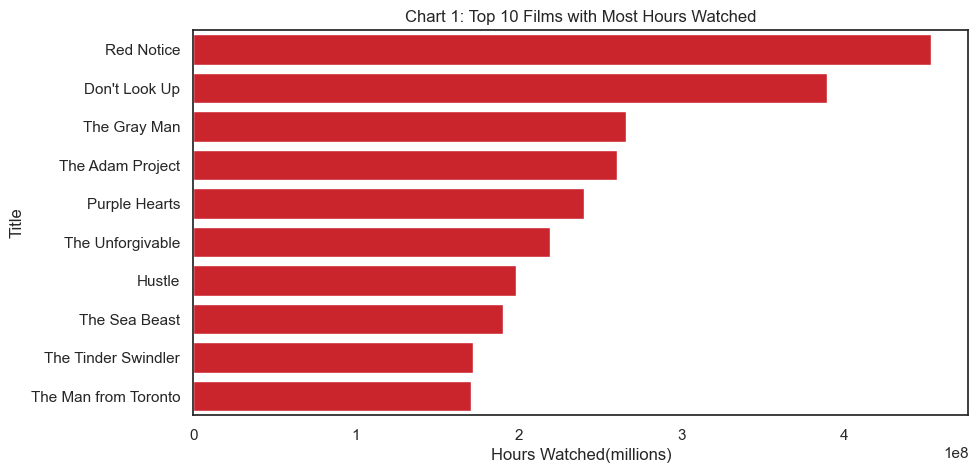

In [76]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='total_hours_watched_in_millions', y='title', data=df, color='#E50914')

ax.set_title('Chart 1: Top 10 Films with Most Hours Watched')
ax.set_xlabel('Hours Watched(millions)')
ax.set_ylabel('Title')

plt.show()

Chart 1 shows the 10 shows that had the most hours watched. All of the Shows are from the English Category, so let's look at the top 10 shows from the Non-English Category as well.

In [77]:
SELECT
    show_title AS title,
    category,
    SUM(weekly_hours_viewed) AS total_hours_watched_in_millions
FROM
    all_weeks_global
WHERE
    category IN ('Films (Non-English)')
GROUP BY
    title, category
ORDER BY
    total_hours_watched_in_millions DESC
LIMIT 10;

,title,category,total_hours_watched_in_millions
0,Blood Red Sky,Films (Non-English),139900000
1,Through My Window,Films (Non-English),114050000
2,All Quiet on the Western Front,Films (Non-English),103420000
3,Black Crab,Films (Non-English),97230000
4,The Takedown,Films (Non-English),82270000
5,Troll,Films (Non-English),75860000
6,RRR (Hindi),Films (Non-English),73090000
7,Loving Adults,Films (Non-English),72720000
8,Major Grom: Plague Doctor,Films (Non-English),66790000
9,The Forgotten Battle,Films (Non-English),64100000


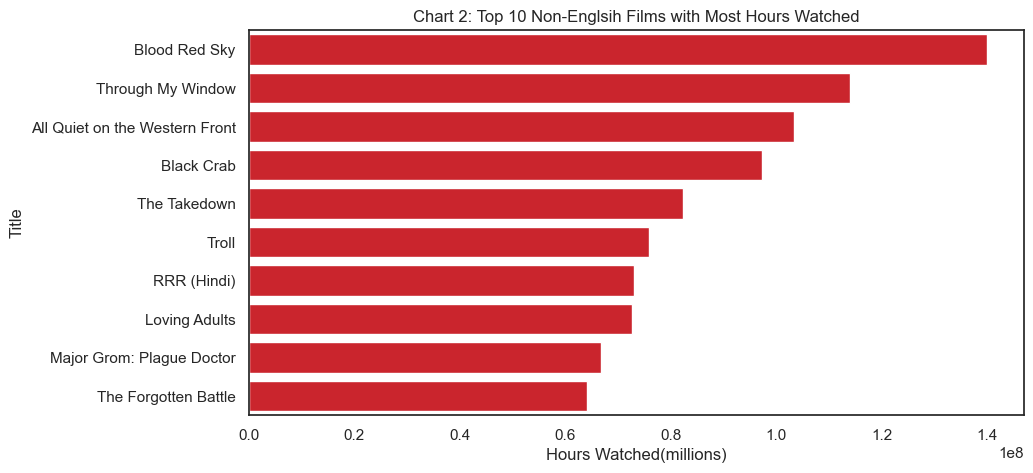

In [78]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='total_hours_watched_in_millions', y='title', data=df, color='#E50914')

ax.set_title('Chart 2: Top 10 Non-Englsih Films with Most Hours Watched')
ax.set_xlabel('Hours Watched(millions)')
ax.set_ylabel('Title')

plt.show()

Total Hours watched isn't necessarily the best metric to determine a movies popularity. While it may imply that one movie was watched more than the other we must also consider that some movies could be much longer than others and skew the average hours watched in either direction. To try to find the most popular movies instead lets look at the movies that spent the most time in the top 10 most viewed by week.

In [79]:
SELECT 
  DISTINCT show_title AS title, 
  category, 
  MAX(cumulative_weeks_in_top_10) AS total_top10
FROM 
  all_weeks_global
WHERE
    category IN ('Films (English)', 'Films (Non-English)')
GROUP BY 
  title, 
  category
ORDER BY 
  total_top10 DESC
LIMIT 10;

,title,category,total_top10
0,Blood Red Sky,Films (Non-English),16
1,RRR (Hindi),Films (Non-English),15
2,Red Notice,Films (English),14
3,Through My Window,Films (Non-English),13
4,Despicable Me 2,Films (English),9
5,Rurouni Kenshin: The Beginning,Films (Non-English),8
6,Lost Bullet,Films (Non-English),8
7,The Adam Project,Films (English),8
8,Sing 2,Films (English),8
9,Don't Look Up,Films (English),8


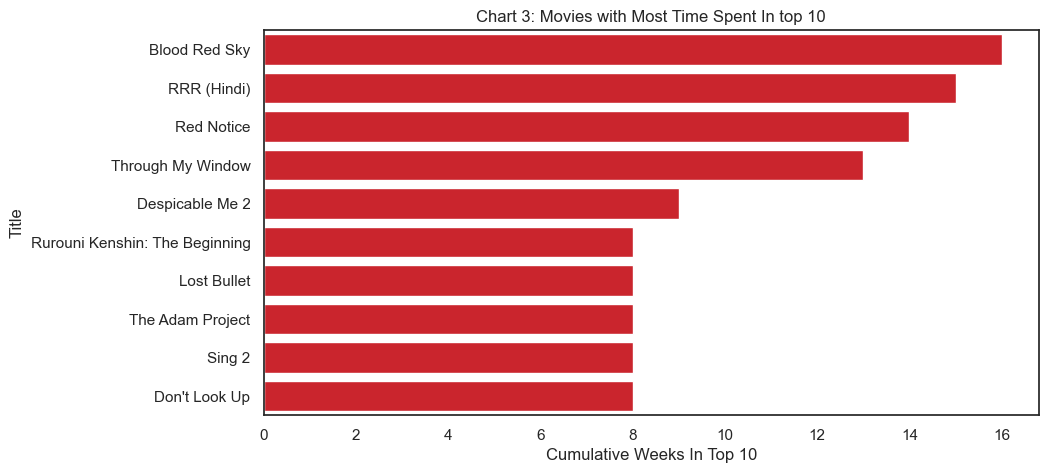

In [80]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='total_top10', y='title', data=df, color='#E50914')

ax.set_title('Chart 3: Movies with Most Time Spent In top 10')
ax.set_xlabel('Cumulative Weeks In Top 10')
ax.set_ylabel('Title')

plt.show()

## Most Popular Movies on Release(First 28 days)

In [81]:
SELECT
 show_title AS title,
 category,
 SUM(hours_viewed_first_28_days) / 1000000 AS total_hours_viewed_mlns
FROM
 most_popular
WHERE
    category IN ('Films (English)', 'Films (Non-English)')
GROUP BY
 title,
 category
ORDER BY
 total_hours_viewed_mlns DESC
LIMIT
 10;

,title,category,total_hours_viewed_mlns
0,Red Notice,Films (English),364.02
1,Don't Look Up,Films (English),359.79
2,Bird Box,Films (English),282.02
3,The Gray Man,Films (English),253.87
4,The Adam Project,Films (English),233.16
5,Extraction,Films (English),231.34
6,Purple Hearts,Films (English),228.69
7,The Unforgivable,Films (English),214.70
8,The Irishman,Films (English),214.57
9,The Kissing Booth 2,Films (English),209.25


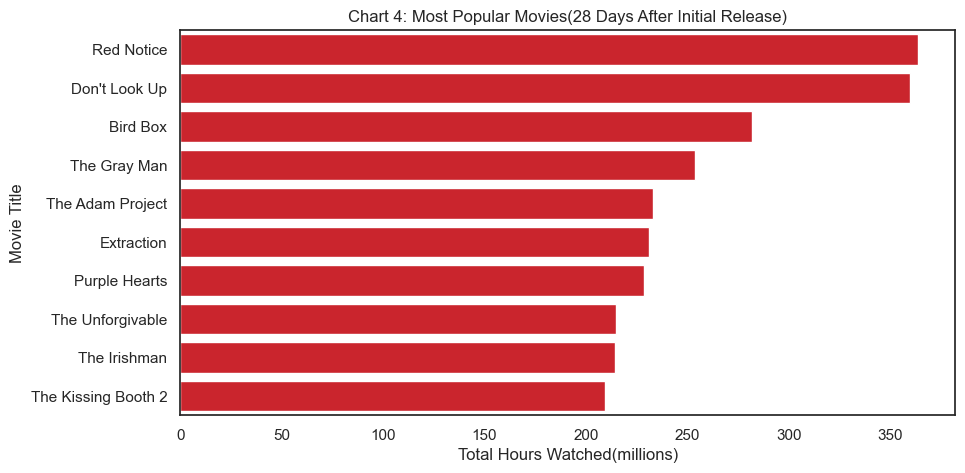

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='total_hours_viewed_mlns', y='title', data=df, color='#E50914')

ax.set_xlabel('Total Hours Watched(millions)')
ax.set_ylabel('Movie Title')
plt.title('Chart 4: Most Popular Movies(28 Days After Initial Release)')
plt.show()

We do see a lot of interseciton of Movies with Chart 1. Interestingly though Bird Box was not in the top 10 most watched(by hours) all time. Looking into it a little Bird Box had a lot of mixed review on released, but one thing was for sure is that it was talked about a lot on [social media platforms](https://screenrant.com/bird-box-netflix-biggest-movie-subscribers-popular-reason/#:~:text=Bird%20Box%20immediately%20captured%20its,ad%20campaign%20for%20the%20film.) causing it to 'go viral' which could be a good reason why it was so successful initially, but once the hype died down it was not able to keep the numbers high.

# Popularity and Viewership of Netflix TV Shows
## Most Viewed TV Shows Globally (By hours watched)

In [83]:
SELECT
    show_title,
    SUM(weekly_hours_viewed) / 1000000 AS total_hours_mlns
FROM
    alL_weeks_global
WHERE
    category IN ('TV (Non-English)', 'TV (English)')
GROUP BY
    show_title
ORDER BY
    total_hours_mlns DESC
LIMIT
 10;

,show_title,total_hours_mlns
0,Stranger Things,2967.98
1,Squid Game,2289.50
2,Money Heist,1170.20
3,Manifest,1131.35
4,DAHMER,962.47
5,Bridgerton,949.01
6,Café con aroma de mujer,813.48
7,You,777.48
8,Wednesday,752.52
9,Ozark,751.60


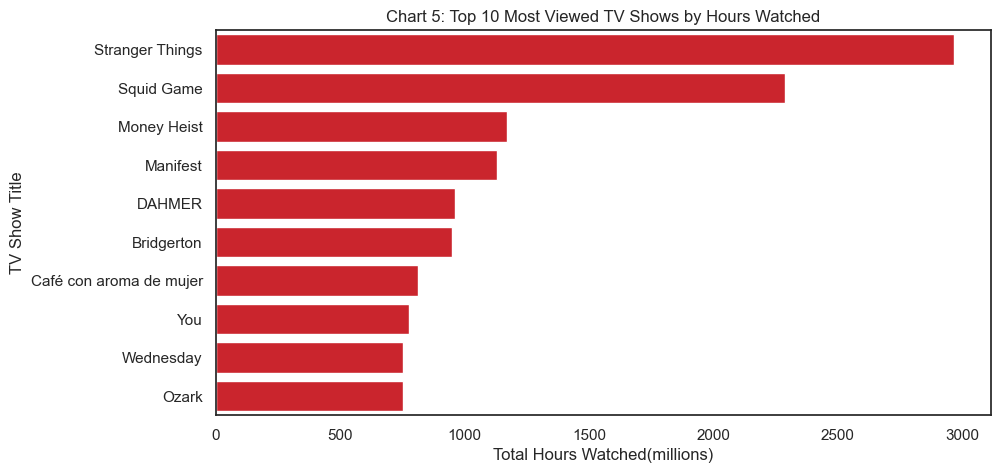

In [84]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='total_hours_mlns', y='show_title', data=df, color='#E50914')

ax.set_title('Chart 5: Top 10 Most Viewed TV Shows by Hours Watched')
ax.set_xlabel('Total Hours Watched(millions)')
ax.set_ylabel('TV Show Title')
plt.show()

Stranger Things and Squid Game were by far the most popular TV shows on Netflix. Stranger things had almost 3 billion hours watched, Squid game had almost 2.5 Billion. Coming in 3rd we had Money Heist with around 1.25 billion hours watched.

## 10 TV Shows With Most Weeks in Top 10

In [85]:
SELECT
 DISTINCT show_title,
 MAX(cumulative_weeks_in_top_10) AS num_weeks_top10
FROM
 all_weeks_global
WHERE
 category IN ('TV (Non-English)', 'TV (English)')
GROUP BY
 show_title
ORDER BY
 num_weeks_top10 DESC
LIMIT
 10;

    

,show_title,num_weeks_top10
0,"Yo soy Betty, la fea",30
1,Café con aroma de mujer,28
2,Manifest,24
3,Extraordinary Attorney Woo,21
4,Squid Game,20
5,Stranger Things,19
6,Hometown Cha-Cha-Cha,16
7,The Queen of Flow,16
8,Carinha de Anjo,15
9,Alchemy of Souls,15


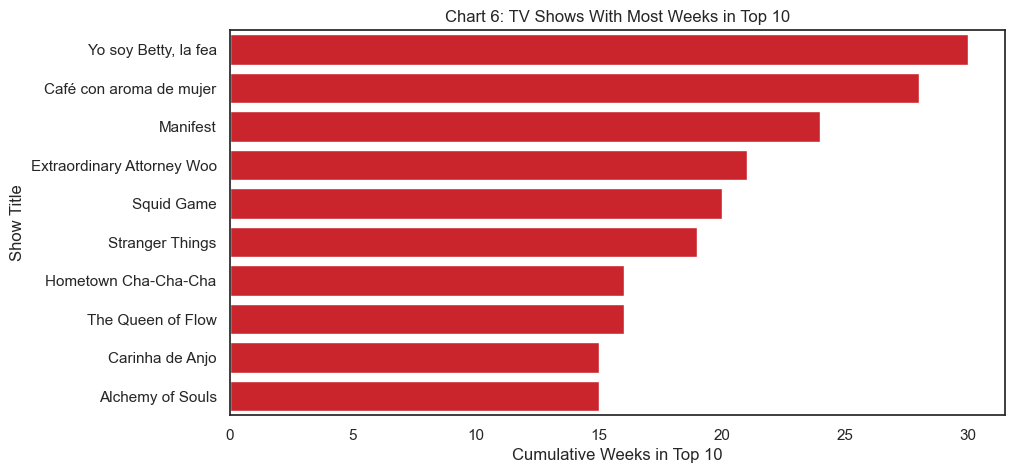

In [86]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='num_weeks_top10', y='show_title', data=df, color='#E50914')

ax.set_title('Chart 6: TV Shows With Most Weeks in Top 10')
ax.set_xlabel('Cumulative Weeks in Top 10')
ax.set_ylabel('Show Title')

plt.show()

Some very interesting shows here that I did not expect to see. We have 3 different Telenovelas that have spent considerable amount of top in the top 10, but only  _Café con aroma de mujer_ was in the top 10 most watched by total hours.

## Most Popular TV Shows 28 Days After Initial Release

In [89]:
SELECT
 show_title,
 SUM(hours_viewed_first_28_days) / 1000000 AS total_hours_mlns
FROM
 most_popular
WHERE
 category IN ('TV (Non-English)', 'TV (English)')
GROUP BY
 show_title
ORDER BY
 total_hours_mlns DESC
LIMIT 10;

,show_title,total_hours_mlns
0,Stranger Things,1934.19
1,Money Heist,1837.64
2,Squid Game,1650.45
3,Bridgerton,1281.75
4,DAHMER,856.22
5,Wednesday,752.52
6,Lucifer,569.48
7,All of Us Are Dead,560.78
8,The Witcher,541.01
9,Inventing Anna,511.92


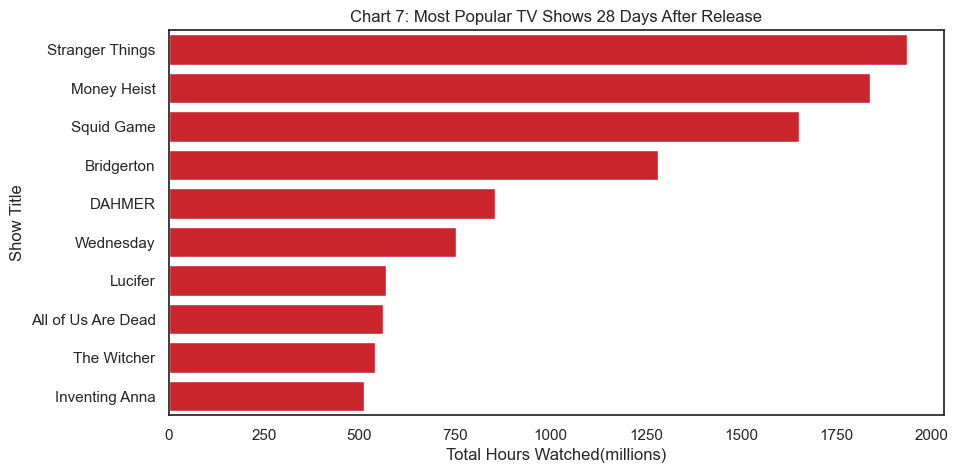

In [90]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='total_hours_mlns', y='show_title', data=df, color='#E50914')

ax.set_title('Chart 7: Most Popular TV Shows 28 Days After Release')
ax.set_xlabel('Total Hours Watched(millions)')
ax.set_ylabel('Show Title')

plt.show()

Most of the shows in Chart 7 seem to lineup with the shows in Chart 5. Stranger Things had the most views in the 28 days following its release.

## What Were the Most Watched and Popular Seasons of TV Shows?

In [95]:
SELECT
 show_title AS show,
 season_title,
 SUM(weekly_hours_viewed) / 1000000 AS total_hrs_mlns
FROM 
 all_weeks_global
WHERE
 category IN ('TV (Non-English)', 'TV (English)')
GROUP BY
 show,
 season_title
ORDER BY
 total_hrs_mlns DESC
LIMIT 10;

,show,season_title,total_hrs_mlns
0,Squid Game,Squid Game: Season 1,2289.50
1,Stranger Things,Stranger Things 4,1887.31
2,DAHMER,DAHMER: Monster: The Jeffrey Dahmer Story,962.47
3,Money Heist,Money Heist: Part 5,905.23
4,Café con aroma de mujer,Café con aroma de mujer: Season 1,813.48
5,Bridgerton,Bridgerton: Season 2,775.24
6,Wednesday,Wednesday: Season 1,752.52
7,Extraordinary Attorney Woo,Extraordinary Attorney Woo: Season 1,662.09
8,All of Us Are Dead,All of Us Are Dead: Season 1,659.51
9,Maid,Maid: Limited Series,655.51


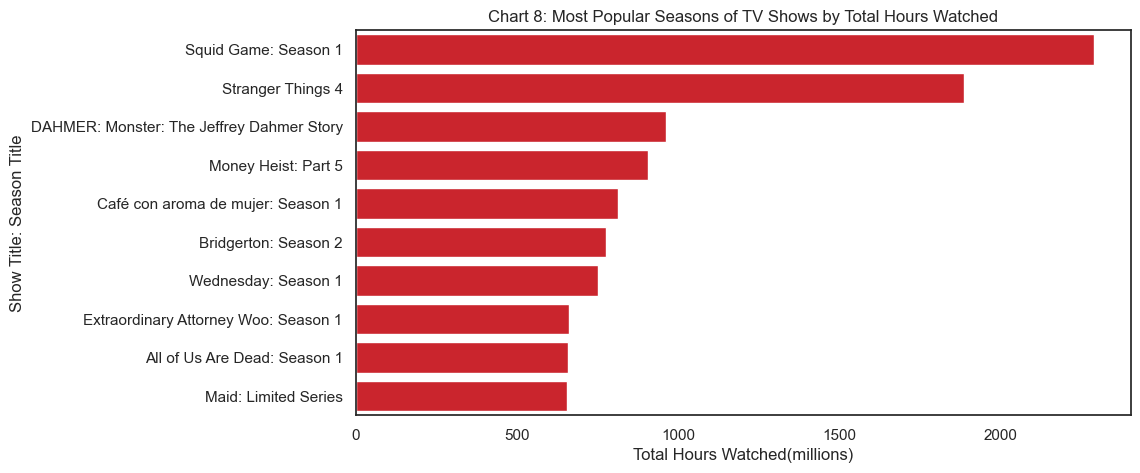

In [97]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x='total_hrs_mlns', y='season_title', data=df, color='#E50914')

ax.set_title('Chart 8: Most Popular Seasons of TV Shows by Total Hours Watched')
ax.set_xlabel('Total Hours Watched(millions)')
ax.set_ylabel('Show Title: Season Title')

plt.show()

Squid Games Season 1 was the most watched season of a TV show and had a staggering 2.3 billion hours viewed. 2nd Place was Stranger Things: Season 4 with 1.9 billion hours viewed. Coming in 3rd was DAHMER: Monster: The Jeffrey Dahmer Story with 960 million hours viewed.

# Looking At Viewship Data By Country

## What Were The Most Popular Movies in Each Country?